In [1]:
#Vianai Systems: Coding Assessment
#Submitted by Sudesh Khillare

In [2]:
#Importing all required libraries
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")
df.head()

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,01/01/2001,U,273
1,41130,Halsted-Orange,01/01/2001,U,306
2,40760,Granville,01/01/2001,U,1059
3,40070,Jackson/Dearborn,01/01/2001,U,649
4,40090,Damen-Brown,01/01/2001,U,411


In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
data=df[df.year>=2002][df.year<=2016]
data.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,station_id,stationname,date,daytype,rides,year
51710,41220,Fullerton,01/01/2002,U,1720,2002
51711,40330,Grand/State,01/01/2002,U,2612,2002
51712,40730,Washington/Wells,01/01/2002,U,209,2002
51713,40880,Thorndale,01/01/2002,U,859,2002
51714,40720,East 63rd-Cottage Grove,01/01/2002,U,441,2002


In [5]:
data_test=df[df.year==2017]
data_test['month'] = pd.DatetimeIndex(data_test['date']).month
data_test.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,station_id,stationname,date,daytype,rides,year,month
831358,40920,Pulaski-Forest Park,01/01/2017,U,1109,2017,1
831359,40890,O'Hare Airport,01/01/2017,U,7905,2017,1
831360,40690,Dempster,01/01/2017,U,375,2017,1
831361,40940,Halsted/63rd,01/01/2017,U,232,2017,1
831362,40780,Central Park,01/01/2017,U,428,2017,1


# Exploratory Data Analysis.

In [6]:
data['month'] = pd.DatetimeIndex(data['date']).month
data.head()

,station_id,stationname,date,daytype,rides,year,month
51710,41220,Fullerton,01/01/2002,U,1720,2002,1
51711,40330,Grand/State,01/01/2002,U,2612,2002,1
51712,40730,Washington/Wells,01/01/2002,U,209,2002,1
51713,40880,Thorndale,01/01/2002,U,859,2002,1
51714,40720,East 63rd-Cottage Grove,01/01/2002,U,441,2002,1


In [7]:
#Doing groupby to find combined effect w.r.t Year, Month and Station
Year_Analysis= data.groupby(['year']).sum()
Month_Analysis= data.groupby(['month']).sum()
Station_Analysis=data.groupby(['stationname']).sum()
Day_Analysis= data.groupby(['daytype']).sum()

In [8]:
#Creating new variable for scatter plot
Year_Analysis['year']=Year_Analysis.index
Month_Analysis['month']=Month_Analysis.index
Station_Analysis['station_name']=Station_Analysis.index
Day_Analysis['day_type']=Day_Analysis.index

Text(0.5, 1.0, 'Total Rides Vs Year')

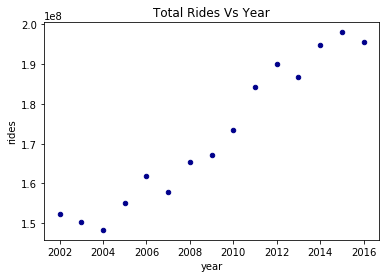

In [9]:
#Plot to show change in rides per year w.r.t Year
ax1 = Year_Analysis.plot.scatter(x='year',y='rides',c='DarkBlue')
plt.title('Total Rides Vs Year')

Text(0.5, 1.0, 'Total Rides Vs Month')

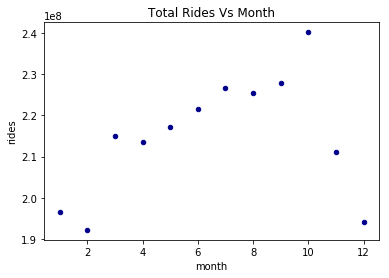

In [10]:
#Plot to show change in rides per month w.r.t combination of all months rides from all years
ax2 = Month_Analysis.plot.scatter(x='month', y='rides',c='DarkBlue')
plt.title(('Total Rides Vs Month'))

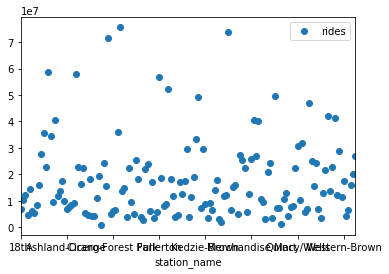

In [11]:
#This is distribution of all rides per station. as station count is around 146, x axis is crowded. 
Station_Analysis.plot(x='station_name', y='rides', style='o')

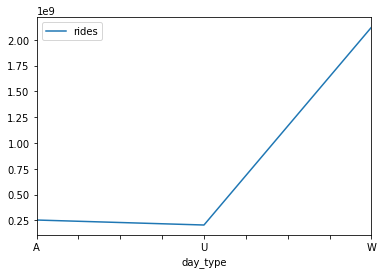

In [12]:
#This is distribution of all rides per weekday. We can confirm on saturday there are less rides, these numbers falls further 
# down on sunday and holidays. On weekday there are rides more than 8 times that of Saturday. 
Day_Analysis.plot(x='day_type', y='rides')

In [13]:
#Here we can confim the datatype for all the variables. Also, this section can explain the count of missing values. Compating entries, there is no missing data in this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779648 entries, 51710 to 831357
Data columns (total 7 columns):
station_id     779648 non-null int64
stationname    779648 non-null object
date           779648 non-null object
daytype        779648 non-null object
rides          779648 non-null int64
year           779648 non-null int64
month          779648 non-null int64
dtypes: int64(4), object(3)
memory usage: 47.6+ MB


In [14]:
#Here we are identifying all the statistical analysis for all variables. This section provides Mean, Standard Deviation, 
#Minimum and Maximum values and quantile ranges for all the numerical columns.
data.describe()

,station_id,rides,year,month
count,779648.000000,779648.000000,779648.000000,779648.000000
mean,40760.336524,3310.724129,2009.016520,6.523382
std,445.024782,3177.348893,4.327247,3.447600
min,40010.000000,0.000000,2002.000000,1.000000
25%,40370.000000,1128.000000,2005.000000,4.000000
50%,40750.000000,2330.000000,2009.000000,7.000000
75%,41150.000000,4358.000000,2013.000000,10.000000
max,41690.000000,36323.000000,2016.000000,12.000000


What are the characteristics of the data?

This dataset is time dependent. Hence simple linear regression won't work here. All other details are explained in above.

What are your findings?

From this dataset we can confirm that there is continous increase in total rides per year from 2002. Also, looking into month details, we can confirm that on an average, first and last month of each yeat have less number of rides. About weekday, we can confim on every Sunday or Holiday, there are lease number of rides and there is slight increase on Saturday. But on weekday there is increase in rides more than 8 times that of Saturday.

What did you learn from the data?

This is a case of time series dataset. One need to apply rolling averages, standard deviation and panel data modelling for better output.

In [15]:
#Now converting the daytype column into numeric variables for further processing. I'm using Label Encoder.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['daytype'])
data['daytype']=le.transform(data['daytype']) 

In [16]:
le = preprocessing.LabelEncoder()
le.fit(data_test['daytype'])
data_test['daytype']=le.transform(data_test['daytype']) 

D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data.head()

,station_id,stationname,date,daytype,rides,year,month
51710,41220,Fullerton,01/01/2002,1,1720,2002,1
51711,40330,Grand/State,01/01/2002,1,2612,2002,1
51712,40730,Washington/Wells,01/01/2002,1,209,2002,1
51713,40880,Thorndale,01/01/2002,1,859,2002,1
51714,40720,East 63rd-Cottage Grove,01/01/2002,1,441,2002,1


In [24]:
Correlation=data.corr()
Correlation['rides'].sort_values()

month         0.017656
station_id    0.039063
year          0.097980
daytype       0.238428
rides         1.000000
Name: rides, dtype: float64

In [18]:
X_Train=data[['station_id','year','daytype','month']]
Y_Train=data['rides']

In [19]:
X_Test=data_test[['station_id','year','daytype','month']]
Y_Test=data_test['rides']

# Model Building

## Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
Lin_Reg=LinearRegression()
Lin_Reg.fit(X_Train,Y_Train)
Y_Pred_Lin_Reg=Lin_Reg.predict(X_Test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Model Evaluation
RMSE_Lin_Reg = np.sqrt(mean_squared_error(Y_Test,Y_Pred_Lin_Reg))
print('Root Mean Squared Error for Linear Regression is: ',RMSE_Lin_Reg)

MAE_Lin_Reg = mean_absolute_error(Y_Test,Y_Pred_Lin_Reg)
print('Mean Absolute Error for Linear Regression is: ',MAE_Lin_Reg)

R_Sqared_Lin_Reg=r2_score(Y_Test,Y_Pred_Lin_Reg)*100
print(R_Sqared_Lin_Reg,'% variance in the data can be explained by this Linear Regression Model')

Root Mean Squared Error for Linear Regression is:  3435.6328164188544
Mean Absolute Error for Linear Regression is:  2518.257180181804
4.8171700116421245 % variance in the data can be explained by this Linear Regression Model


## Random Forest Regression 

In [23]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
Rand_For=RandomForestRegressor()
Rand_For.fit(X_Train,Y_Train)
Y_Pred_Rand_For=Rand_For.predict(X_Test)

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
#Model Evaluation
RMSE_Rand_For = np.sqrt(mean_squared_error(Y_Test,Y_Pred_Rand_For))
print('Root Mean Squared Error for Random Forest Regression is: ',RMSE_Rand_For)

MAE_Rand_For = mean_absolute_error(Y_Test,Y_Pred_Rand_For)
print('Mean Absolute Error for Random Forest Regression is: ',MAE_Rand_For)

R_Sqared_Rand_For=r2_score(Y_Test,Y_Pred_Rand_For)*100
print(R_Sqared_Rand_For,'% variance in the data can be explained by this Random Forest Regression Model')

Root Mean Squared Error for Random Forest Regression is:  875.3892333930298
Mean Absolute Error for Random Forest Regression is:  364.37821594127297
93.82058261938245 % variance in the data can be explained by this Random Forest Regression Model


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
Grad_Boost=GradientBoostingRegressor()
Grad_Boost.fit(X_Train,Y_Train)
Y_Pred_Grad_Boost=Grad_Boost.predict(X_Test)


#Model Evaluation
RMSE_Grad_Boost = np.sqrt(mean_squared_error(Y_Test,Y_Pred_Grad_Boost))
print('Root Mean Squared Error for Gradint Boosting Regression is: ',RMSE_Grad_Boost)

MAE_Grad_Boost = mean_absolute_error(Y_Test,Y_Pred_Grad_Boost)
print('Mean Absolute Error for Gradint Boosting Regression is: ',MAE_Grad_Boost)

R_Sqared_Grad_Boost=r2_score(Y_Test,Y_Pred_Grad_Boost)*100
print(R_Sqared_Grad_Boost,'% variance in the data can be explained by this Gradint Boosting Regression Model')

Root Mean Squared Error for Gradint Boosting Regression is:  2250.6861849546635
Mean Absolute Error for Gradint Boosting Regression is:  1630.4905413994463
59.15160295894597 % variance in the data can be explained by this Gradint Boosting Regression Model


1. I believe this lower R Squared value and higher RMSE in linear regression is becoz it's time dependent data. Time series analysis will be more effective in this case. Moslty panel data modelling will be more  effective.
2. Talking about other models, we are getting significant R Squared value from model, but looking now into time series approach below.

Now we need to consider both Year and Station for prediction of rides. That will be the panel data modelling. But due to interest of time, I'm considering only date for prediction.

# Time Series Approach

In [26]:
#Loading Data again with the requirement of time series analysis
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
df_ts = pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv", parse_dates=['date'], index_col='date',date_parser=dateparse)
print ('\n Parsed Data:')
print (df_ts.head())


 Parsed Data:
            station_id       stationname daytype  rides
date                                                   
2001-01-01       40350       UIC-Halsted       U    273
2001-01-01       41130    Halsted-Orange       U    306
2001-01-01       40760         Granville       U   1059
2001-01-01       40070  Jackson/Dearborn       U    649
2001-01-01       40090       Damen-Brown       U    411


In [27]:
#Resetting the index to date for analysis
df_ts['date']=df_ts.index

In [28]:
df_ts.index

DatetimeIndex(['2001-01-01', '2001-01-01', '2001-01-01', '2001-01-01',
               '2001-01-01', '2001-01-01', '2001-01-01', '2001-01-01',
               '2001-01-01', '2001-01-01',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=936632, freq=None)

In [29]:
df_ts['year'] = pd.DatetimeIndex(df_ts['date']).year
df_ts.head()

,station_id,stationname,daytype,rides,date,year
date,,,,,,
2001-01-01,40350,UIC-Halsted,U,273,2001-01-01,2001
2001-01-01,41130,Halsted-Orange,U,306,2001-01-01,2001
2001-01-01,40760,Granville,U,1059,2001-01-01,2001
2001-01-01,40070,Jackson/Dearborn,U,649,2001-01-01,2001
2001-01-01,40090,Damen-Brown,U,411,2001-01-01,2001


In [30]:
#Creating chunk of data
data_ts=df_ts[df_ts.year>=2002]
#data_test=df_ts[df_ts.year==2017]

In [31]:
data_ts.head()

,station_id,stationname,daytype,rides,date,year
date,,,,,,
2002-01-01,41220,Fullerton,U,1720,2002-01-01,2002
2002-01-01,40330,Grand/State,U,2612,2002-01-01,2002
2002-01-01,40730,Washington/Wells,U,209,2002-01-01,2002
2002-01-01,40880,Thorndale,U,859,2002-01-01,2002
2002-01-01,40720,East 63rd-Cottage Grove,U,441,2002-01-01,2002


In [32]:
data_test.head()

,station_id,stationname,date,daytype,rides,year,month
831358,40920,Pulaski-Forest Park,01/01/2017,1,1109,2017,1
831359,40890,O'Hare Airport,01/01/2017,1,7905,2017,1
831360,40690,Dempster,01/01/2017,1,375,2017,1
831361,40940,Halsted/63rd,01/01/2017,1,232,2017,1
831362,40780,Central Park,01/01/2017,1,428,2017,1


In [33]:
ts = data_ts['rides']
ts.head(10)

date
2002-01-01    1720
2002-01-01    2612
2002-01-01     209
2002-01-01     859
2002-01-01     441
2002-01-01     414
2002-01-01     171
2002-01-01     302
2002-01-01       0
2002-01-01    1758
Name: rides, dtype: int64

In [34]:
Time_Series_Data= ts.groupby(['date']).sum()

In [35]:
#Now this data shows the total ride in system per day.
Time_Series_Data.head()

date
2002-01-01    103438
2002-01-02    415228
2002-01-03    441970
2002-01-04    446663
2002-01-05    207618
Name: rides, dtype: int64

Text(0.5, 1.0, 'Total Rides Vs Year')

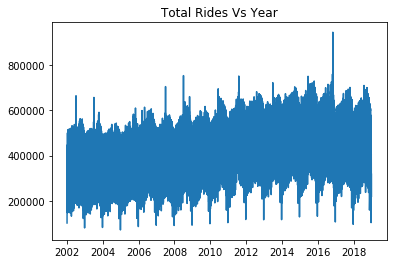

In [36]:
import matplotlib.pyplot as plt
import matplotlib
plt.plot(Time_Series_Data)
plt.title('Total Rides Vs Year')

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics i.e. standard deviation and mean for 12 months
    rolmean =timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    

    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

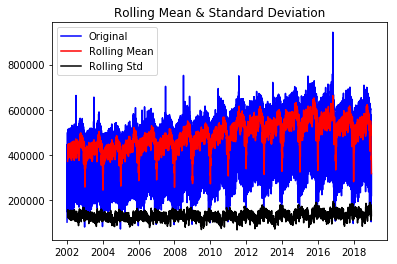

Results of Dickey-Fuller Test:
Test Statistic                   -3.962916
p-value                           0.001618
#Lags Used                       34.000000
Number of Observations Used    6174.000000
Critical Value (1%)              -3.431410
Critical Value (5%)              -2.862008
Critical Value (10%)             -2.567019
dtype: float64


In [38]:
#Now passing our data to above function
test_stationarity(Time_Series_Data)

From the stationary analysis we can refer Rolling Mean and Rolling Standard Deviation, we can confirm rolling standard deviation is almost but in case of rolling averages, there is an increasing trend. Thus processing further to make this time series stationary.

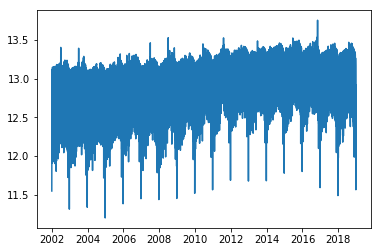

In [39]:
#Taking Log Trandform of data to reduce the trend.
import numpy as np
ts_log = np.log(Time_Series_Data)
plt.plot(ts_log)

Text(0.5, 1.0, 'Log of Original Data')

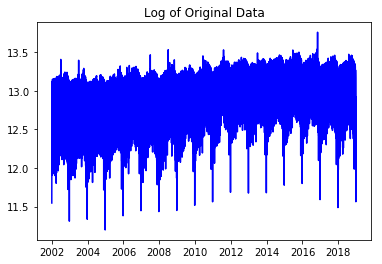

In [40]:
#For moving average considering last year, i.e. 12 months
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log,color='blue')
plt.title('Log of Original Data')


Text(0.5, 1.0, 'Moving Avg of Log Data')

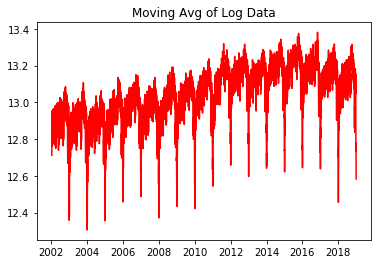

In [41]:
plt.plot(moving_avg, color='red')
plt.title('Moving Avg of Log Data')

In [42]:
#Now calculating the difference w.r.t. moving average for each date
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

date
2002-01-01         NaN
2002-01-02         NaN
2002-01-03         NaN
2002-01-04         NaN
2002-01-05         NaN
2002-01-06         NaN
2002-01-07         NaN
2002-01-08         NaN
2002-01-09         NaN
2002-01-10         NaN
2002-01-11         NaN
2002-01-12   -0.386132
2002-01-13   -0.831051
2002-01-14    0.367488
2002-01-15    0.369013
Name: rides, dtype: float64

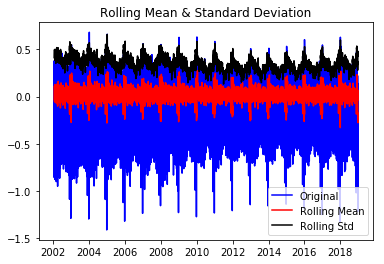

Results of Dickey-Fuller Test:
Test Statistic                -1.532490e+01
p-value                        4.017720e-28
#Lags Used                     3.400000e+01
Number of Observations Used    6.163000e+03
Critical Value (1%)           -3.431412e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


In [43]:
#Dropping all the values where difference is Nan
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Here p value is less than 5% critical value hence we can be 95% sure that this time series is stationary. 

As we have seen increase in rides w.r.t year, problem with previous approach is it will generate averages over the year. Sometimes we need futher down approach, hence performing exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. 

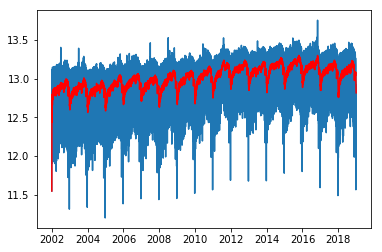

In [44]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

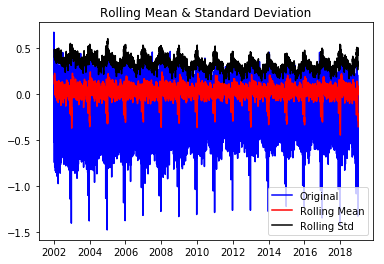

Results of Dickey-Fuller Test:
Test Statistic                -1.029361e+01
p-value                        3.517715e-18
#Lags Used                     3.400000e+01
Number of Observations Used    6.174000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862008e+00
Critical Value (10%)          -2.567019e+00
dtype: float64


In [45]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

it's similar anayisis providing about certainty of Stationary Time Series.

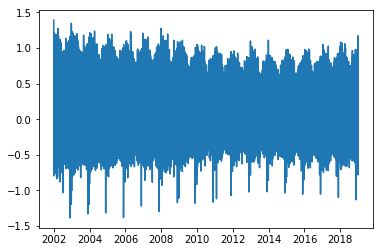

In [46]:
#Using differentiating approach
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

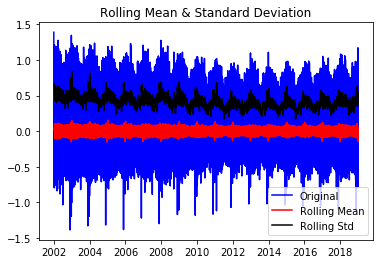

Results of Dickey-Fuller Test:
Test Statistic                  -21.378531
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6173.000000
Critical Value (1%)              -3.431410
Critical Value (5%)              -2.862008
Critical Value (10%)             -2.567019
dtype: float64


In [47]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

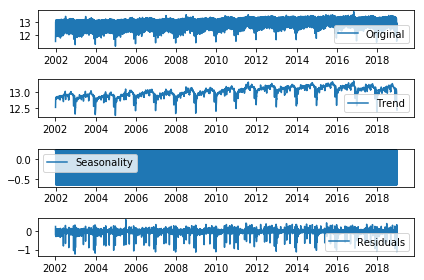

In [48]:
#Using Decomposing approach
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

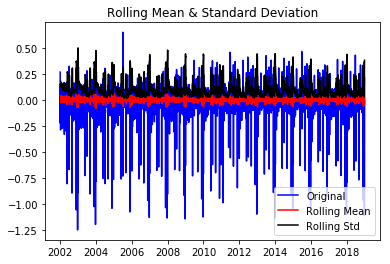

Results of Dickey-Fuller Test:
Test Statistic                  -31.405601
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    6169.000000
Critical Value (1%)              -3.431410
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567019
dtype: float64


In [49]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Time Series Forecasting Model

Now we are forecasting on preprocessed data but we need to add back seasonality and noise in predictions.

In [50]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [51]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

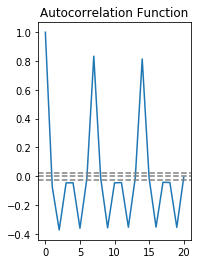

In [52]:
#q value is where ACF crossed the upper confidence interval for first time.
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Time_Series_Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Time_Series_Data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

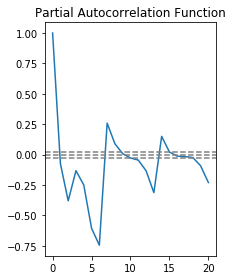

In [53]:
#Plot PACF:
#P value is where PACF crossed the upper confidence interval for first time.
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Time_Series_Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Time_Series_Data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 938.3570')

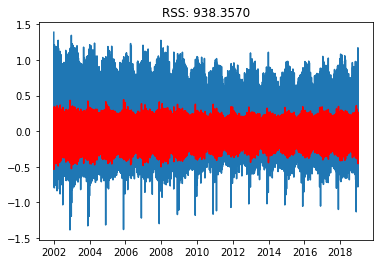

In [55]:
#AR Model
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 585.4951')

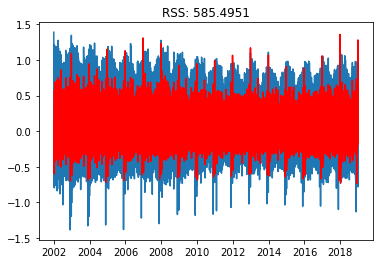

In [56]:
#MA Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 585.4951')

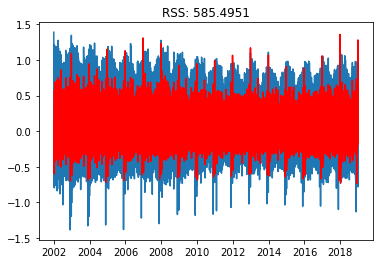

In [57]:
#Combined Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2002-01-02   -0.000016
2002-01-03   -0.073960
2002-01-04   -0.468003
2002-01-05   -0.534393
2002-01-06   -0.255995
dtype: float64


In [59]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2002-01-02   -0.000016
2002-01-03   -0.073976
2002-01-04   -0.541979
2002-01-05   -1.076372
2002-01-06   -1.332367
dtype: float64


In [60]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2002-01-01    11.546728
2002-01-02    11.546712
2002-01-03    11.472752
2002-01-04    11.004749
2002-01-05    10.470355
dtype: float64

Text(0.5, 1.0, 'RMSE: 9725.8758')

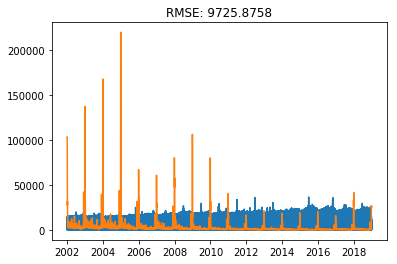

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

RMSE for time series model is 9725.8758, which is significantly more as compared to previous machine learning models. Here I provided two different approaches to handle the problem. One Traditional Machine Learning and another one is Time Series.

Please explain how you built the model and justify the choices you made.

1. I followed two approaches here. One is traditional Machine Learning and another one is Time Series Analysis. This way I gave two options.
2. In traditional machine learning, there is not consistency in model, but we are using some other variables there. Like day of week, station id, month and year. We haven't introduced time component into the analysis. We can find significantly lower RMSE values for Random Forest Model.
3. On the other hand, in case of Time Series Analysis, we are considering only date for prediction. Thus we can find comparatively higher RMSE value in Time Series Analysis.

How would you evaluate this model to ensure it would be robust for production usage?

1. I will perform retraining of the model after regular intervals of time. This way we can be sure that models are upto date with production requirement.
2. While designing the production model, I will consider adding ensemble of different models. This way I can be sure that any particular model is not introducing it's own bias into the production system. 
3. I will perform latest machine learning algorithms like hyperparameter tuning, regularization and deep learning to optimize the performance.

In [ ]:
#Submitted by Sudesh V Khillare